# 1. Read and understand the data

In [1]:
import pandas as pd

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
cricket_df = pd.read_csv('Cricket.csv', encoding_errors = 'ignore')

In [4]:
cricket_df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar(INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara(Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting(AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya(Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene(Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [5]:
cricket_df.shape

(79, 13)

In [6]:
# choosing strike rate and average as the two factors for clustering
cluster_df = cricket_df[['Ave','SR']]

In [7]:
cluster_df.head()

,Ave,SR
0,44.83,86.23
1,41.98,78.86
2,42.03,80.39
3,32.36,91.20
4,33.37,78.96


In [8]:
cluster_df.rename(columns={'Ave':'Avg'}, inplace=True)

In [9]:
cluster_df.head()

,Avg,SR
0,44.83,86.23
1,41.98,78.86
2,42.03,80.39
3,32.36,91.20
4,33.37,78.96


# 2. Modelling

In [10]:
# Rescaling

#instantiate a scaler

scaler = StandardScaler()

In [11]:
#fit_transform
cluster_df_scaled = scaler.fit_transform(cluster_df)

In [12]:
cluster_df_scaled

array([[ 1.07229395,  0.70315153],
       [ 0.58772461, -0.0441395 ],
       [ 0.59622582,  0.1109969 ],
       [-1.04790945,  1.20709133],
       [-0.87618487, -0.03399986],
       [ 0.16946476, -0.51259058],
       [ 0.99238251, -0.64947564],
       [ 0.42450125, -0.56734461],
       [ 0.108256  , -0.8167796 ],
       [ 0.33268811,  0.02176813],
       [ 0.12695867,  0.70315153],
       [ 0.54181804, -0.42538973],
       [-0.44772356,  1.78910632],
       [ 2.17575185,  0.95258652],
       [-0.2725985 , -0.53489778],
       [ 2.5549061 ,  2.1247282 ],
       [-0.61604765,  0.1860302 ],
       [-0.20288853,  0.58958763],
       [ 0.11675721,  0.13938788],
       [ 0.52311536, -0.86747777],
       [-0.3355075 ,  0.84916225],
       [ 0.48400977, -1.64315977],
       [-0.16208269, -1.17369472],
       [ 0.14056062, -0.24287632],
       [-0.590544  ,  2.53842527],
       [ 2.62121559,  1.1857981 ],
       [-0.40691772,  0.4020044 ],
       [-2.5424233 ,  3.82311689],
       [-1.04110847,

In [13]:
# Convert it into dataframe for further steps

cluster_df_scaled = pd.DataFrame(cluster_df_scaled)

In [14]:
cluster_df_scaled

,0,1
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000
...,...,...
74,1.106299,-1.457604
75,0.829159,-0.562275
76,-0.537836,-0.234765
77,0.208570,1.332823


In [15]:
cluster_df_scaled.columns = ['Avg','SR']

In [16]:
cluster_df_scaled

,Avg,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000
...,...,...
74,1.106299,-1.457604
75,0.829159,-0.562275
76,-0.537836,-0.234765
77,0.208570,1.332823


In [17]:
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(cluster_df_scaled)

KMeans(n_clusters=3, random_state=100)

In [18]:
# assign the label
cluster_df['Cluster_Id'] = kmeans.labels_
cluster_df.head()

,Avg,SR,Cluster_Id
0,44.83,86.23,0
1,41.98,78.86,1
2,42.03,80.39,1
3,32.36,91.20,2
4,33.37,78.96,1


In [19]:
cricket_df['Cluster_Id'] = kmeans.labels_
cricket_df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Cluster_Id
0,SR Tendulkar(INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,0
1,KC Sangakkara(Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1
2,RT Ponting(AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1
3,ST Jayasuriya(Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,2
4,DPMD Jayawardene(Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1


# 3. Analysis

In [20]:
# Find cluster of Virat Kohli
cricket_df[cricket_df.Player.str.contains('Kohli', case=False)]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Cluster_Id
25,V Kohli(INDIA),2008-2017,188,180,29,8146,183,53.94,8952,90.99,27,43,11,0


### 1. Find which player is in same cluster as Virat Kohli

In [21]:
# Find the cluster assigned to Virat Kohli
virat_cluster = cricket_df[cricket_df['Player'].str.contains("V Kohli", case=False, na=False)]['Cluster_Id'].values[0]

# Find players in the same cluster as Virat Kohli
same_cluster_players = cricket_df[cricket_df['Cluster_Id'] == virat_cluster]['Player']

# Check for the specific players among the options provided
target_players = ["ST Jayasuriya", "SR Tendulkar", "CH Gayle", "Yuvraj Singh"]
players_in_same_cluster = [player for player in target_players 
                           if same_cluster_players.str.contains(player, case=False, na=False).any()]

# Output the results
print("Players in the same cluster as Virat Kohli:")
print(same_cluster_players.to_list())
print("\nAmong the provided players:")
print(players_in_same_cluster)

Players in the same cluster as Virat Kohli:
['SR Tendulkar(INDIA)', 'MS Dhoni(Asia/INDIA)', 'AB de Villiers(Afr/SA)', 'V Kohli(INDIA)', 'MJ Clarke(AUS)', 'HM Amla(SA)', 'MG Bevan(AUS)', 'IVA Richards(WI)', 'LRPL Taylor(NZ)', 'ML Hayden(AUS/ICC)', 'MJ Guptill(NZ)', 'MEK Hussey(AUS)', 'RG Sharma(INDIA)']

Among the provided players:
['SR Tendulkar']


### 2. Based on the clustering, choose the correct statement given that the clusters formed are (high SR, high Ave) - A, (low SR, low Ave) - B, (High SR, Low Ave) - C, (Low SR, High Ave) - D

In [22]:
cricket_df[cricket_df.Player.str.contains('Tendulkar', case=False)]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Cluster_Id
0,SR Tendulkar(INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,0


In [23]:
cricket_df[cricket_df.Player.str.contains('RIchards', case=False)]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Cluster_Id
42,IVA Richards(WI),1975-1991,187,167,24,6721,189*,47.00,7451,90.20,11,45,7,0
47,RB Richardson(WI),1983-1996,224,217,30,6248,122,33.41,9801,63.74,5,44,8,1


In [24]:
cricket_df[cricket_df.Player.str.contains('Dravid', case=False)]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Cluster_Id
8,R Dravid(Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13,1


In [25]:
cricket_df[cricket_df.Player.str.contains('Gayle', case=False)]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Cluster_Id
17,CH Gayle(ICC/WI),1999-2015,269,264,17,9221,215,37.33,10834,85.11,22,47,23,2


In [26]:
cricket_df[cricket_df.Player.str.contains('Guptill', case=False)]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Cluster_Id
63,MJ Guptill(NZ),2009-2017,146,143,16,5500,237*,43.3,6269,87.73,12,32,12,0


In [27]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [28]:
Z = sch.linkage(cluster_df_scaled, method='complete')

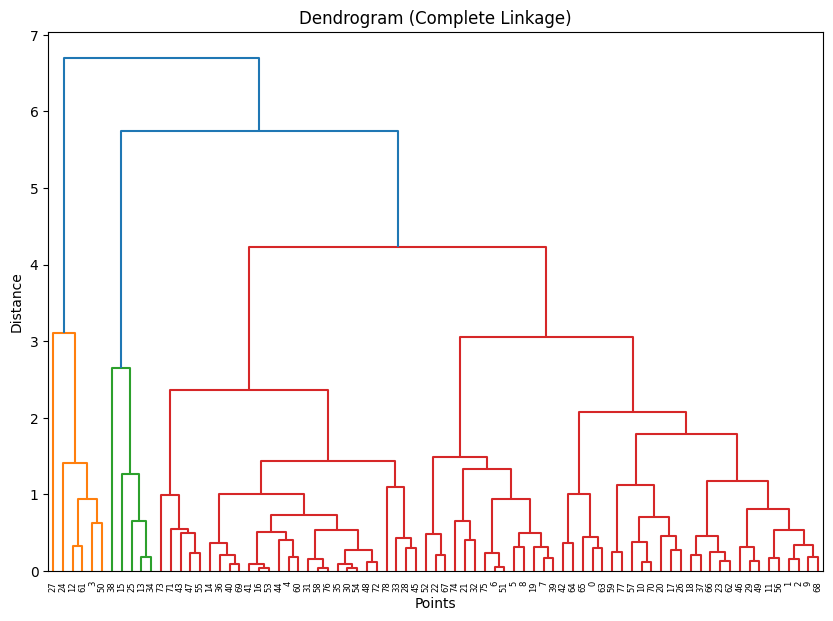

In [29]:
# Create the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(Z)

# Cut the tree at k = 4
plt.axhline(y=8, color='r', linestyle='--')  # adjust y-value based on your dendrogram

plt.title('Dendrogram (Complete Linkage)')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

In [30]:
cricket_df[cricket_df.Player.str.contains('Ganguly', case=False)]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Cluster_Id
7,SC Ganguly(Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,15416,73.7,22,72,16,1


In [31]:
cricket_df[cricket_df.Player.str.contains('Sehwag', case=False)]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Cluster_Id
24,V Sehwag(Asia/ICC/INDIA),1999-2013,251,245,9,8273,219,35.05,7929,104.33,15,38,14,2
